In [14]:
import sys
sys.path.append('../../')

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, fmm

In [20]:
num_particles = 1000

normal_max = int(0.5 * math.log2(num_particles))
if normal_max > 2:
    max_levels = np.arange(normal_max-3, normal_max+3)
else:
    max_levels = np.arange(0, normal_max+3)

terms = 4

In [21]:
particles = [general.Particle() for _ in range(num_particles)]

times = []

for max_level in max_levels:
    print(f'Max Level: {max_level}')
    method = fmm.FMM(particles, terms, max_level)
    time = %timeit -o method.do_method()
    times.append(time)

Max Level: 1
2.11 s ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Max Level: 2
849 ms ± 8.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Max Level: 3
293 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Max Level: 4
199 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Max Level: 5
575 ms ± 8.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Max Level: 6
2.33 s ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
averages = [time.average for time in times]
stdevs = [time.stdev for time in times]

In [23]:
FILE_PATH = 'data/max_level.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    normal_max=normal_max,
    terms=terms,
    averages=averages,
    stdevs=stdevs,
    max_levels=max_levels
)

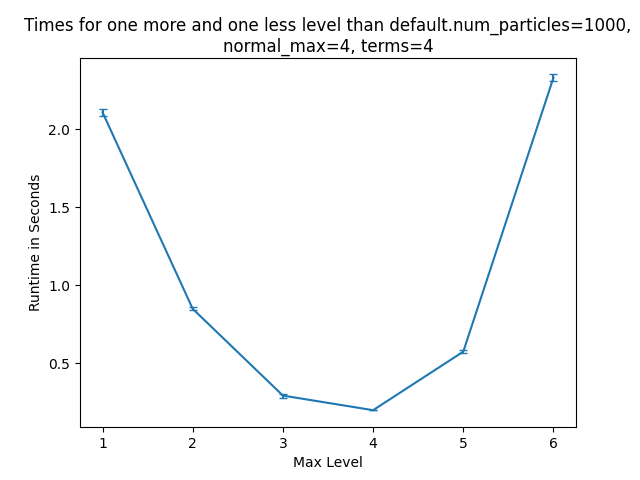

In [25]:
FILE_PATH = 'data/max_level.npz'
fig = plots.max_level(FILE_PATH)